In [1]:
import os
import numpy as np
import pandas as pd

from unidecode import unidecode

import tensorflow as tf
from tensorflow import keras

import pickle # saving and loading trained model
from os import path

# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# importing library for plotting
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn import metrics
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

from keras.layers import Dropout, Activation, Flatten, Convolution1D, Dropout, Reshape
from keras.layers import Dense # importing dense layer
from keras.models import Sequential #importing Sequential layer

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
    print(gpu, "\n")
else:
  print("No GPU device found")

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU') 



In [3]:
!nvidia-smi

Sat Oct 15 16:27:57 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 522.25       Driver Version: 522.25       CUDA Version: 11.8     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
|  0%   48C    P8    12W / 200W |    837MiB /  8192MiB |      7%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import pandas as pd
import glob

path = r'H:/Datasets/CIC-IDS2017/TrafficLabelling' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, encoding='cp1252', index_col=None, header=0)
    li.append(df)
    print("Read Completed for ", filename)

df = pd.concat(li, axis=0, ignore_index=True)

df = df.rename(columns={' Label': 'Label'})

Read Completed for  H:/Datasets/CIC-IDS2017/TrafficLabelling\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
Read Completed for  H:/Datasets/CIC-IDS2017/TrafficLabelling\Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
Read Completed for  H:/Datasets/CIC-IDS2017/TrafficLabelling\Friday-WorkingHours-Morning.pcap_ISCX.csv
Read Completed for  H:/Datasets/CIC-IDS2017/TrafficLabelling\Monday-WorkingHours.pcap_ISCX.csv
Read Completed for  H:/Datasets/CIC-IDS2017/TrafficLabelling\Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
Read Completed for  H:/Datasets/CIC-IDS2017/TrafficLabelling\Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
Read Completed for  H:/Datasets/CIC-IDS2017/TrafficLabelling\Tuesday-WorkingHours.pcap_ISCX.csv
Read Completed for  H:/Datasets/CIC-IDS2017/TrafficLabelling\Wednesday-workingHours.pcap_ISCX.csv


In [3]:
df.describe()

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,...,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06
mean,4.112886e+04,8.071483e+03,9.880341e+00,1.478566e+07,9.361160e+00,1.039377e+01,5.493024e+02,1.616264e+04,2.075999e+02,1.871366e+01,...,5.418218e+00,-2.741688e+03,8.155132e+04,4.113412e+04,1.531825e+05,5.829582e+04,8.316037e+06,5.038439e+05,8.695752e+06,7.920031e+06
std,2.229494e+04,1.828363e+04,5.261922e+00,3.365374e+07,7.496728e+02,9.973883e+02,9.993589e+03,2.263088e+06,7.171848e+02,6.033935e+01,...,6.364257e+02,1.084989e+06,6.485999e+05,3.933815e+05,1.025825e+06,5.770923e+05,2.363008e+07,4.602984e+06,2.436689e+07,2.336342e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.277400e+04,5.300000e+01,6.000000e+00,1.550000e+02,2.000000e+00,1.000000e+00,1.200000e+01,0.000000e+00,6.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.094400e+04,8.000000e+01,6.000000e+00,3.131600e+04,2.000000e+00,2.000000e+00,6.200000e+01,1.230000e+02,3.700000e+01,2.000000e+00,...,1.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,5.841300e+04,4.430000e+02,1.700000e+01,3.204828e+06,5.000000e+00,4.000000e+00,1.870000e+02,4.820000e+02,8.100000e+01,3.600000e+01,...,2.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553500e+04,6.553500e+04,1.700000e+01,1.200000e+08,2.197590e+05,2.919220e+05,1.290000e+07,6.554530e+08,2.482000e+04,2.325000e+03,...,2.135570e+05,1.380000e+02,1.100000e+08,7.420000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08


In [4]:
df.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.5-104.16.207.165-54865-443-6,104.16.207.165,443.0,192.168.10.5,54865.0,6.0,7/7/2017 3:30,3.0,2.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,192.168.10.5-104.16.28.216-55054-80-6,104.16.28.216,80.0,192.168.10.5,55054.0,6.0,7/7/2017 3:30,109.0,1.0,1.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,192.168.10.5-104.16.28.216-55055-80-6,104.16.28.216,80.0,192.168.10.5,55055.0,6.0,7/7/2017 3:30,52.0,1.0,1.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,192.168.10.16-104.17.241.25-46236-443-6,104.17.241.25,443.0,192.168.10.16,46236.0,6.0,7/7/2017 3:30,34.0,1.0,1.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,192.168.10.5-104.19.196.102-54863-443-6,104.19.196.102,443.0,192.168.10.5,54863.0,6.0,7/7/2017 3:30,3.0,2.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [5]:
df["Label"].value_counts()

BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack – Brute Force         1507
Web Attack – XSS                  652
Infiltration                       36
Web Attack – Sql Injection         21
Heartbleed                         11
Name: Label, dtype: int64

In [3]:
print(df.shape)

(3119345, 85)


In [7]:
from scipy.stats import zscore

def expand_categories(values):
    result = []
    s = values.value_counts()
    t = float(len(values))
    for v in s.index:
        result.append("{}:{}%".format(v,round(100*(s[v]/t),2)))
    return "[{}]".format(",".join(result))
        
def analyze(df):
    print()
    cols = df.columns.values
    total = float(len(df))

    print("{} rows".format(int(total)))
    for col in cols:
        uniques = df[col].unique()
        unique_count = len(uniques)
        if unique_count>100:
            print("** {}:{} ({}%)".format(col,unique_count,int(((unique_count)/total)*100)))
        else:
            print("** {}:{}".format(col,expand_categories(df[col])))
            expand_categories(df[col])

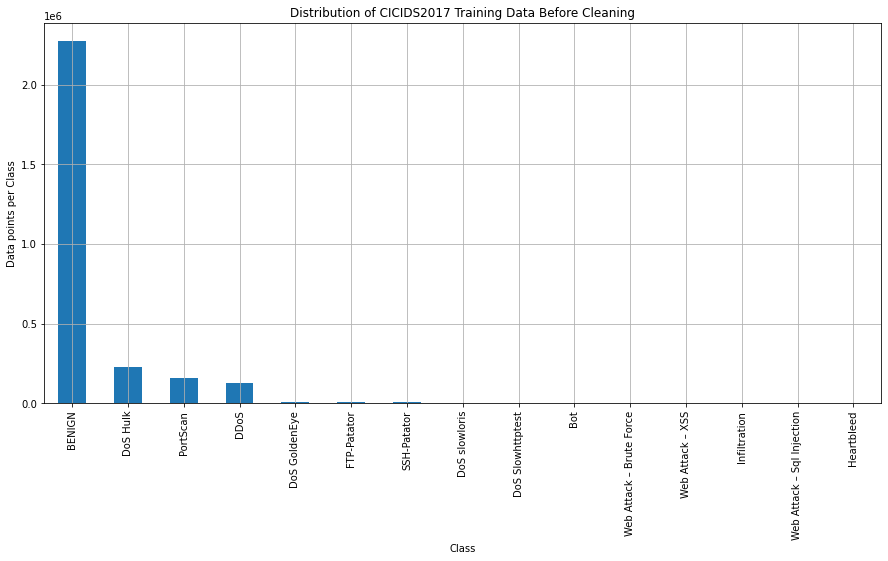

In [7]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

plt.figure(figsize=(15,7))
class_distribution = df['Label'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of CICIDS2017 Training Data Before Cleaning')
plt.grid()
plt.show()

In [8]:
# Before Cleaning Data set for Duplicate
sorted_ds = np.argsort(-class_distribution.values)
for i in sorted_ds:
    print('Number of data points in class', class_distribution.index[i],':', class_distribution.values[i], 
          '(', np.round((class_distribution.values[i]/df.shape[0]*100), 3), '%)')

Number of data points in class BENIGN : 2273097 ( 72.871 %)
Number of data points in class DoS Hulk : 231073 ( 7.408 %)
Number of data points in class PortScan : 158930 ( 5.095 %)
Number of data points in class DDoS : 128027 ( 4.104 %)
Number of data points in class DoS GoldenEye : 10293 ( 0.33 %)
Number of data points in class FTP-Patator : 7938 ( 0.254 %)
Number of data points in class SSH-Patator : 5897 ( 0.189 %)
Number of data points in class DoS slowloris : 5796 ( 0.186 %)
Number of data points in class DoS Slowhttptest : 5499 ( 0.176 %)
Number of data points in class Bot : 1966 ( 0.063 %)
Number of data points in class Web Attack – Brute Force : 1507 ( 0.048 %)
Number of data points in class Web Attack – XSS : 652 ( 0.021 %)
Number of data points in class Infiltration : 36 ( 0.001 %)
Number of data points in class Web Attack – Sql Injection : 21 ( 0.001 %)
Number of data points in class Heartbleed : 11 ( 0.0 %)


In [9]:
del sorted_ds

#drop na values and reset index
data_clean = df.dropna().reset_index()

# Checkng for DUPLICATE values
data_clean.drop_duplicates(keep='first', inplace = True)

data_clean['Label'].value_counts()

print("Read {} rows.".format(len(data_clean)))

Read 2829385 rows.


In [11]:
analyze(df)


3119345 rows
** Flow ID:1085072 (34%)
**  Source IP:17006 (0%)
**  Source Port:64641 (2%)
**  Destination IP:19113 (0%)
**  Destination Port:53806 (1%)
**  Protocol:[6.0:58.65%,17.0:32.04%,0.0:0.05%]
**  Timestamp:27966 (0%)
**  Flow Duration:1050900 (33%)
**  Total Fwd Packets:1433 (0%)
**  Total Backward Packets:1748 (0%)
** Total Length of Fwd Packets:17929 (0%)
**  Total Length of Bwd Packets:64699 (2%)
**  Fwd Packet Length Max:5280 (0%)
**  Fwd Packet Length Min:385 (0%)
**  Fwd Packet Length Mean:109092 (3%)
**  Fwd Packet Length Std:254385 (8%)
** Bwd Packet Length Max:4839 (0%)
**  Bwd Packet Length Min:584 (0%)
**  Bwd Packet Length Mean:154285 (4%)
**  Bwd Packet Length Std:249207 (7%)
** Flow Bytes/s:1595245 (51%)
**  Flow Packets/s:1242274 (39%)
**  Flow IAT Mean:1170378 (37%)
**  Flow IAT Std:1057047 (33%)
**  Flow IAT Max:580290 (18%)
**  Flow IAT Min:136317 (4%)
** Fwd IAT Total:493099 (15%)
**  Fwd IAT Mean:738964 (23%)
**  Fwd IAT Std:700373 (22%)
**  Fwd IAT Max:437

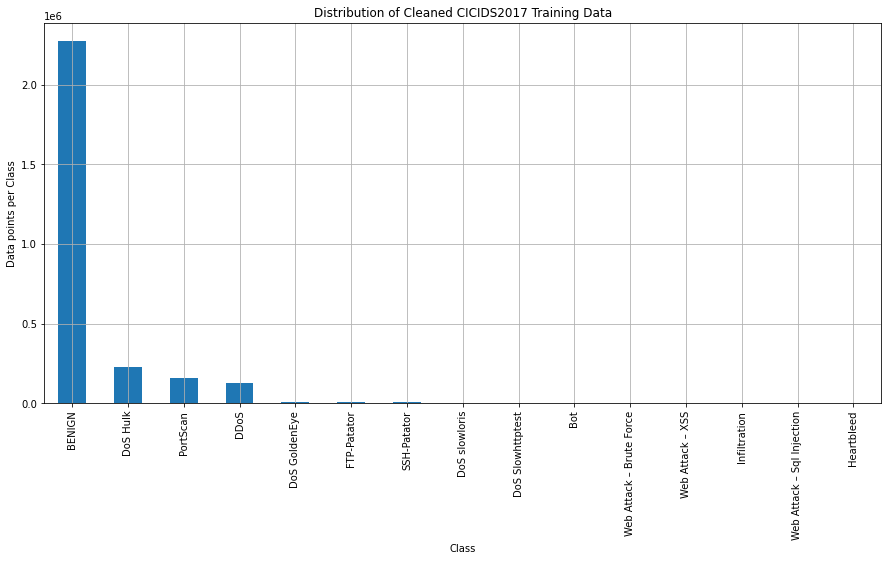

In [10]:
plt.figure(figsize=(15,7))
class_distribution = data_clean['Label'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of Cleaned CICIDS2017 Training Data')
plt.grid()
plt.show()

In [11]:
# After Cleaning Data set for Duplicate
sorted_ds = np.argsort(-class_distribution.values)
for i in sorted_ds:
    print('Number of data points in class', class_distribution.index[i],':', class_distribution.values[i], 
          '(', np.round((class_distribution.values[i]/df.shape[0]*100), 3), '%)')

Number of data points in class BENIGN : 2272688 ( 72.858 %)
Number of data points in class DoS Hulk : 230124 ( 7.377 %)
Number of data points in class PortScan : 158930 ( 5.095 %)
Number of data points in class DDoS : 128027 ( 4.104 %)
Number of data points in class DoS GoldenEye : 10293 ( 0.33 %)
Number of data points in class FTP-Patator : 7938 ( 0.254 %)
Number of data points in class SSH-Patator : 5897 ( 0.189 %)
Number of data points in class DoS slowloris : 5796 ( 0.186 %)
Number of data points in class DoS Slowhttptest : 5499 ( 0.176 %)
Number of data points in class Bot : 1966 ( 0.063 %)
Number of data points in class Web Attack – Brute Force : 1507 ( 0.048 %)
Number of data points in class Web Attack – XSS : 652 ( 0.021 %)
Number of data points in class Infiltration : 36 ( 0.001 %)
Number of data points in class Web Attack – Sql Injection : 21 ( 0.001 %)
Number of data points in class Heartbleed : 11 ( 0.0 %)


In [12]:
data_clean=data_clean.drop('Flow ID',axis=1)
data_clean=data_clean.drop(' Source IP',axis=1)
data_clean=data_clean.drop(' Destination IP',axis=1)
data_clean=data_clean.drop(' Timestamp',axis=1)
#df=df.drop(' Source Port',axis=1)
#df=df.drop(' Destination Port',axis=1)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder



#drop na values and reset index
data_clean = data_clean.dropna().reset_index()

# label encoding
labelencoder = LabelEncoder()
data_clean['Label'] = labelencoder.fit_transform(data_clean['Label'])

data_clean['Label'].value_counts()

0     2272688
4      230124
10     158930
2      128027
3       10293
7        7938
11       5897
6        5796
5        5499
1        1966
12       1507
14        652
9          36
13         21
8          11
Name: Label, dtype: int64

In [16]:
print(data_clean.shape)

(2829385, 83)


In [14]:
data_np = data_clean.to_numpy(dtype="float32")

#drop inf values
data_np = data_np[~np.isinf(data_np).any(axis=1)]

X = data_np[:, 0:81]

enc = OneHotEncoder()

Y = enc.fit_transform(data_np[:,82:]).toarray()

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.25, random_state=2, shuffle=True)

_features = X.shape[1]
n_classes = Y.shape[1]

print('X.shape = ',X.shape)
print('Y.shape = ',Y.shape)
print('X_train.shape = ',X_train.shape)
print('y_train.shape = ', Y_train.shape)
print('X_test.shape = ', X_test.shape)
print('y_test.shape = ',Y_test.shape)

X.shape =  (2827876, 81)
Y.shape =  (2827876, 15)
X_train.shape =  (2120907, 81)
y_train.shape =  (2120907, 15)
X_test.shape =  (706969, 81)
y_test.shape =  (706969, 15)


In [19]:
print("X Shape: ", X.shape)
print("Y Shape: ", Y.shape)

X Shape:  (2827876, 81)
Y Shape:  (2827876, 15)


In [27]:
data = df.iloc[:,1:-1]

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data.iloc[:,0] = label_encoder.fit_transform(data.iloc[:,0]).astype('float64')

In [ ]:
corr = data.corr()

In [ ]:
import seaborn as sns

sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(corr)

# DNN

In [26]:
# In order to ignore FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

from keras.models import Sequential
from keras import callbacks
from keras.layers import Dense, Activation, Flatten, Convolution1D, Dropout
from sklearn import metrics

import uuid
import gc
from tensorflow import keras
import tensorflow as tf

In [27]:
from tensorflow.keras.callbacks import EarlyStopping


# Simple 4 Layer Dense Model
model = Sequential()
model.add(Dense(128, input_dim=_features, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(n_classes, kernel_initializer='normal'))
model.add(Dense(n_classes))
model.add(Activation('softmax'))
model.summary() 

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='BinaryCrossentropy', optimizer=opt, metrics=['accuracy'])

early_stop_callback = keras.callbacks.EarlyStopping(monitor='loss', patience=5)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                  patience=3, min_lr=0.001)
    
history = model.fit(X_train, Y_train,
                              batch_size=128,
                              epochs=30,
                              verbose=True, #,callbacks=[reduce_lr, early_stop_callback],
                              validation_data=(X_test, Y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               10368     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 15)                1

In [28]:
import tensorflow.keras.backend as K
print('Learning Rate - ')
print(K.eval(model.optimizer.lr)) 
print('==================================')
model.summary()

model.save('H:/Datasets/CIC-IDS2017/model_dnn.h5')

Learning Rate - 
1e-04
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               10368     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (Non

In [29]:
import datetime as dt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn import preprocessing

start = dt.datetime.now()

escore = model.evaluate(X_test, Y_test, batch_size=32)
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_eval = np.argmax(Y_test,axis=1)

score = metrics.accuracy_score(y_eval, pred)
rscore = recall_score(y_eval, pred, average='weighted')
ascore = precision_score(y_eval, pred, average='weighted')
f1score= f1_score(y_eval, pred, average='weighted') #F1 = 2 * (precision * recall) / (precision + recall) for manual

lb = preprocessing.LabelBinarizer()
lb.fit(y_eval)
y_eval = lb.transform(y_eval)
pred = lb.transform(pred)
roc_score = roc_auc_score(y_eval, pred)
#roc_auc_socre = multiclass_roc_auc_score(y_eval, pred)

print('Completed')
print('Time taken:',dt.datetime.now()-start)

print("Validation score: {}".format(score))
print("Evaluation score: {}".format(escore))
print("Recall score: {}".format(rscore))
print("Precision score: {}".format(ascore))
print("F1 Measure score: {}".format(f1score))
print("ROC-AUC score: {}".format(roc_score))

22093/22093 [==============================] - 19s 871us/step
Completed
Time taken: 0:01:10.475854
Validation score: 0.9990268314452261
Evaluation score: [0.00044091546442359686, 0.9990268349647522]
Recall score: 0.9990268314452261
Precision score: 0.9990555372394413
F1 Measure score: 0.999019426147367
ROC-AUC score: 0.9404604527629831


In [30]:
# Plot for training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

In [31]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test = Y_test.argmax(axis=1)

22093/22093 [==============================] - 19s 872us/step


In [32]:
pred.shape
y_test.shape

(706969,)

In [33]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import seaborn as sn

confMat = confusion_matrix(y_test, pred)
confMat

array([[567545,      2,     33,     10,     76,     10,      0,     16,
             0,      2,     11,      6,     50,      0,      7],
       [    10,    469,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0],
       [     3,      0,  32116,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0],
       [     1,      0,      0,   2574,     13,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0],
       [   275,      0,      0,      0,  57172,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0],
       [     6,      0,      0,      0,      0,   1350,      5,      0,
             0,      0,      0,      0,      0,      0,      0],
       [     6,      0,      0,      0,      0,      4,   1430,      0,
             0,      0,      0,      0,      0,      0,      0],
       [    10,      0,      0,      0,  

In [34]:
start_by_epoch = 1
epochs = range(start_by_epoch, len(loss_values) + 1)

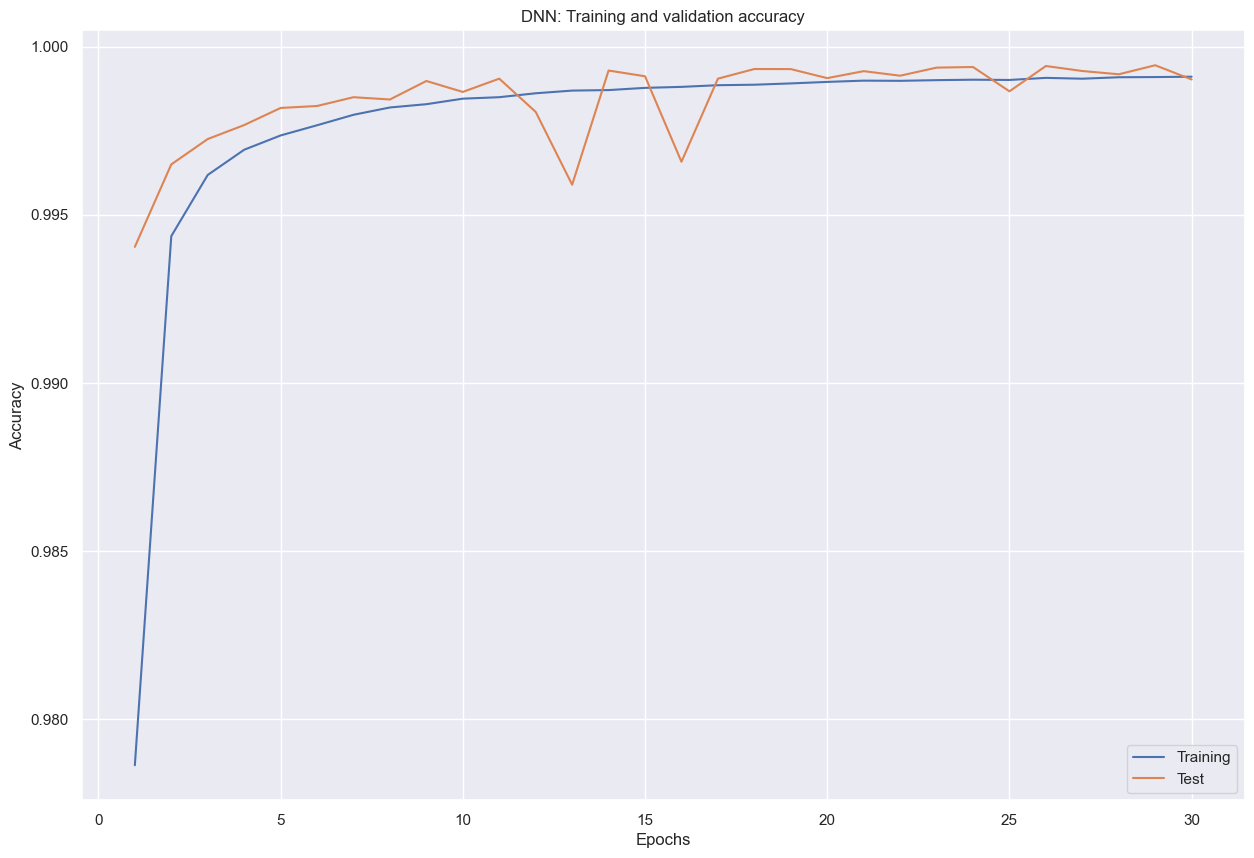

<Figure size 1500x1000 with 0 Axes>

In [35]:
plt.plot(epochs, acc[start_by_epoch-1:], label='Training accuracy')
plt.plot(epochs, val_acc[start_by_epoch-1:], label='Validation accuracy')
plt.title('DNN: Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Test'], loc='lower right')

plt.show()
plt.clf()

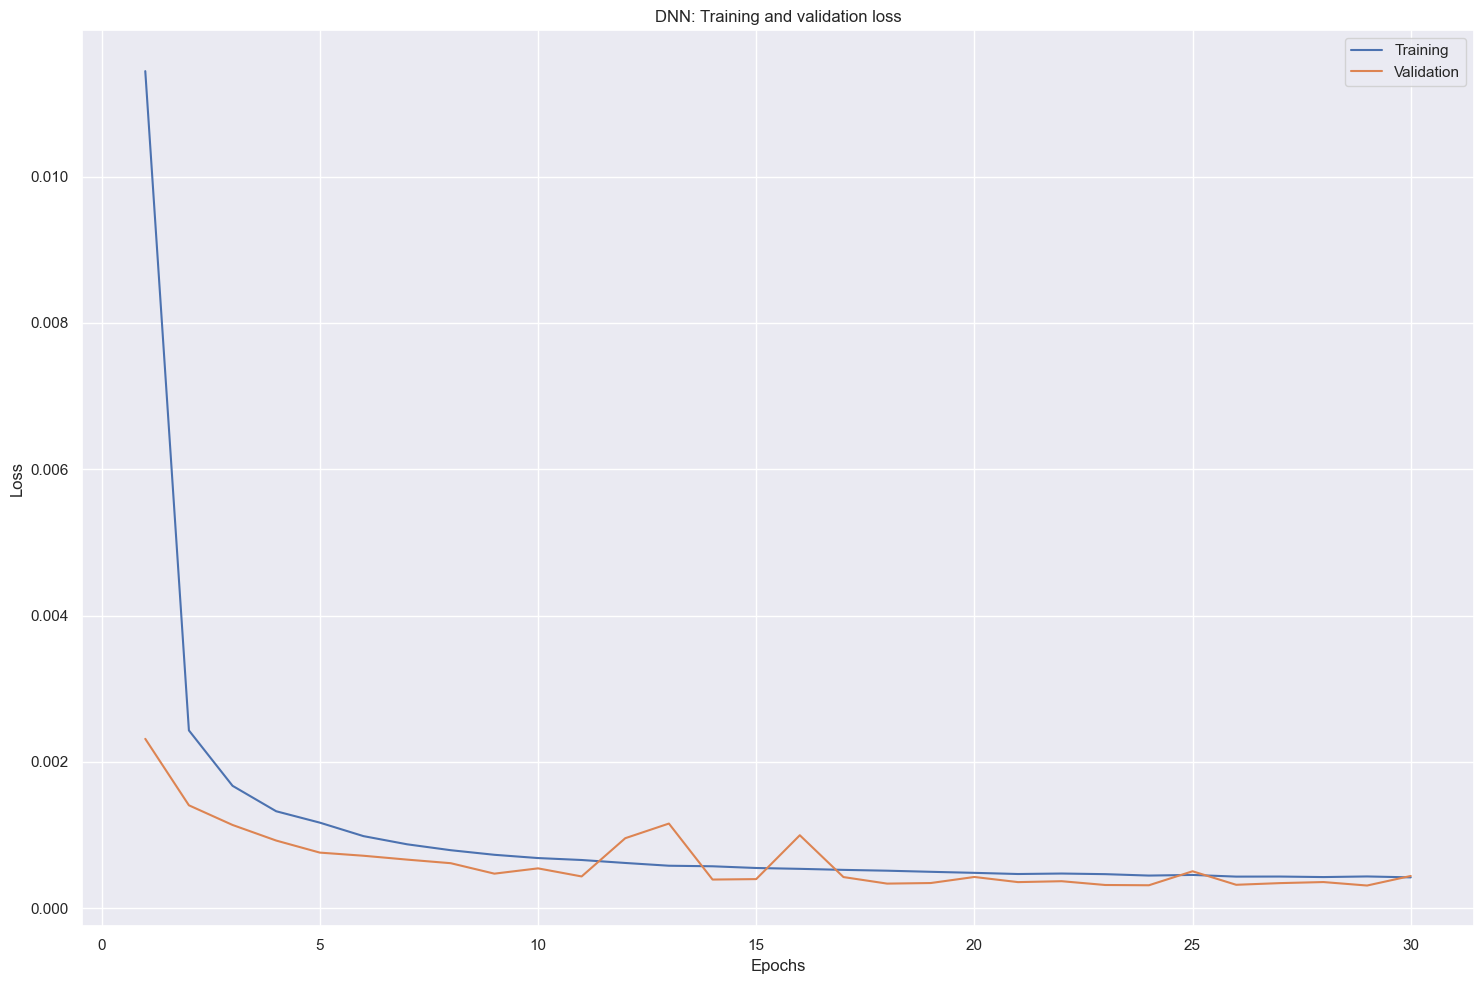

<Figure size 1500x1000 with 0 Axes>

In [36]:
#plt.subplot(212)

plt.plot(epochs, loss_values[start_by_epoch-1:], label='Training Loss')
plt.plot(epochs, val_loss_values[start_by_epoch-1:], label='Validation Loss')
plt.title('DNN: Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.tight_layout()

plt.show()
plt.clf()

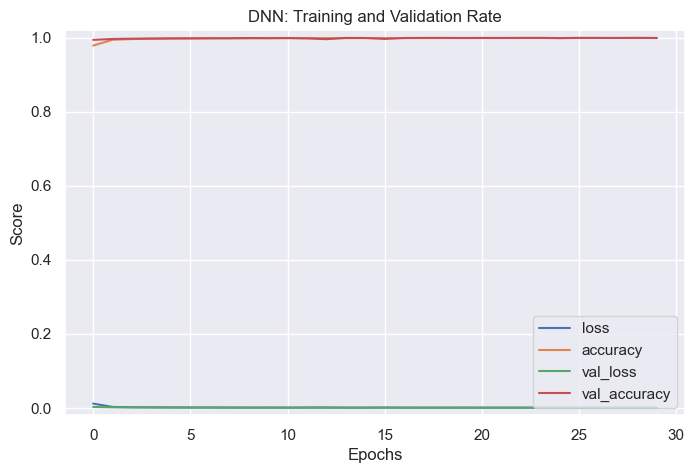

In [37]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(-0.02,1.02)
plt.title('DNN: Training and Validation Rate')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.show()

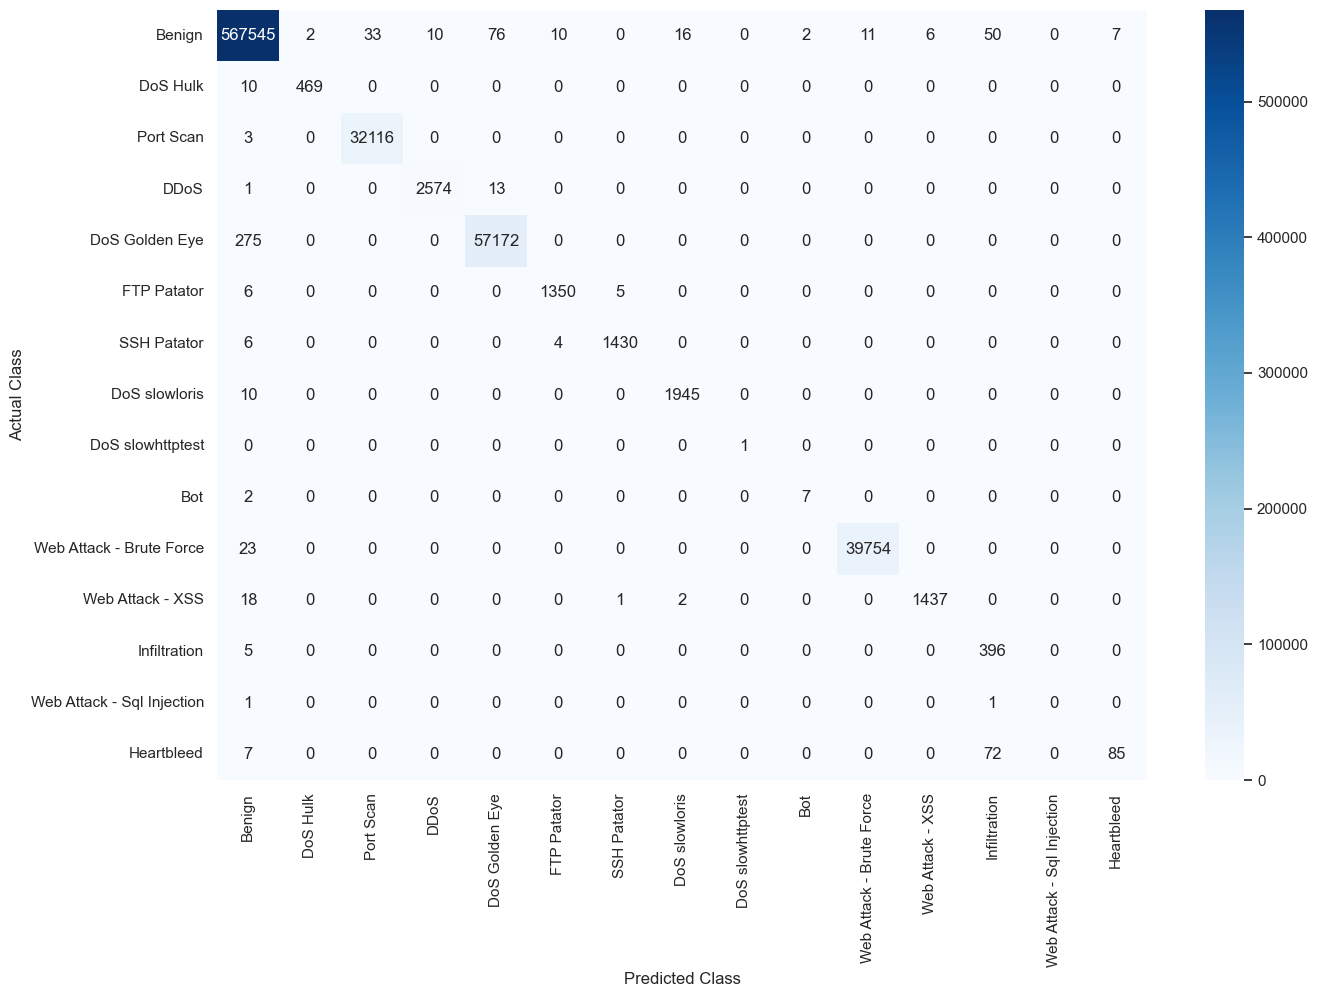

In [38]:
cf_matrix = confusion_matrix(y_test, pred)
cm_df = pd.DataFrame(cf_matrix)

labels = ['Benign','DoS Hulk','Port Scan','DDoS','DoS Golden Eye','FTP Patator','SSH Patator','DoS slowloris',
          'DoS slowhttptest','Bot','Web Attack - Brute Force','Web Attack - XSS','Infiltration','Web Attack - Sql Injection',
         'Heartbleed']

#plt.figure(figsize=(20,15))
#sn.set(font_scale=1.4)
sn.set(rc = {'figure.figsize':(15,10)})
sn.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels, yticklabels=labels, cmap='Blues')

#sn.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
    
plt.show()  

# CNN

In [22]:
# In order to ignore FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

from keras.models import Sequential
from keras import callbacks
from keras.layers import Dense, Activation, Flatten, Convolution1D, Dropout
from sklearn import metrics
from hyperopt import fmin, hp, tpe, Trials, STATUS_OK
from hyperopt.plotting import main_plot_history, main_plot_vars
import uuid
import gc
from tensorflow import keras
import tensorflow as tf

K = keras.backend

X_train = X_train.reshape(X_train.shape[0], _features, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], _features, 1).astype('float32')


# CNN Model
model = Sequential()
model.add(Convolution1D(filters=128, kernel_size=6, input_shape=(_features, 1)))
model.add(Activation('relu'))
model.add(Convolution1D(filters=256, kernel_size=6))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(n_classes))
model.add(Activation('softmax'))
model.summary() 

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['accuracy'])

early_stop_callback = keras.callbacks.EarlyStopping(monitor='loss', patience=5)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                  patience=3, min_lr=0.0001)
    
history = model.fit(X_train, Y_train,
                              batch_size=128,
                              epochs=30,
                              verbose=True, #callbacks=[reduce_lr, early_stop_callback],
                              validation_data=(X_test, Y_test))  

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 76, 128)           896       
                                                                 
 activation (Activation)     (None, 76, 128)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 71, 256)           196864    
                                                                 
 activation_1 (Activation)   (None, 71, 256)           0         
                                                                 
 flatten (Flatten)           (None, 18176)             0         
                                                                 
 dense (Dense)               (None, 256)               4653312   
                                                                 
 dropout (Dropout)           (None, 256)               0

In [23]:
#y_pred = model.predict_classes(X_test)
y_pred = np.argmax(model.predict(X_test), axis=-1)
balanced_score = metrics.balanced_accuracy_score(np.argmax(Y_test, axis=1), y_pred) * 100
    
best_loss = np.amin(history.history['val_loss']) 
print('Best loss: {}'.format(best_loss))
print('Balanced Acc loss: {}'.format(balanced_score))
    
    
import tensorflow.keras.backend as K
print('Learning Rate - ')
print(K.eval(model.optimizer.lr)) 
print('==================================')
model.summary()

model.save('H:/Datasets/CIC-IDS2017/model_cnn.h5')

22093/22093 [==============================] - 18s 808us/step
Best loss: 0.0010283286683261395
Balanced Acc loss: 94.78779845277
Learning Rate - 
1e-04
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 76, 128)           896       
                                                                 
 activation (Activation)     (None, 76, 128)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 71, 256)           196864    
                                                                 
 activation_1 (Activation)   (None, 71, 256)           0         
                                                                 
 flatten (Flatten)           (None, 18176)             0         
                                                                 
 dense (Dense)               (None, 

In [24]:
import datetime as dt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn import preprocessing

start = dt.datetime.now()

escore = model.evaluate(X_test, Y_test, batch_size=32)
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_eval = np.argmax(Y_test,axis=1)

score = metrics.accuracy_score(y_eval, pred)
rscore = recall_score(y_eval, pred, average='weighted')
ascore = precision_score(y_eval, pred, average='weighted')
f1score= f1_score(y_eval, pred, average='weighted') #F1 = 2 * (precision * recall) / (precision + recall) for manual

lb = preprocessing.LabelBinarizer()
lb.fit(y_eval)
y_eval = lb.transform(y_eval)
pred = lb.transform(pred)
roc_score = roc_auc_score(y_eval, pred)
#roc_auc_socre = multiclass_roc_auc_score(y_eval, pred)

print('Completed')
print('Time taken:',dt.datetime.now()-start)

print("Validation score: {}".format(score))
print("Evaluation score: {}".format(escore))
print("Recall score: {}".format(rscore))
print("Precision score: {}".format(ascore))
print("F1 Measure score: {}".format(f1score))
print("ROC-AUC score: {}".format(roc_score))

22093/22093 [==============================] - 18s 815us/step
Completed
Time taken: 0:01:03.304259
Validation score: 0.9997312470560944
Evaluation score: [0.001031577936373651, 0.9997312426567078]
Recall score: 0.9997312470560944
Precision score: 0.9997356835334247
F1 Measure score: 0.9997325238989045
ROC-AUC score: 0.9739197421460956


In [25]:
# Plot for training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

In [26]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test = Y_test.argmax(axis=1)

22093/22093 [==============================] - 18s 819us/step


In [27]:
pred.shape
y_test.shape

(706969,)

In [28]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import seaborn as sn

confMat = confusion_matrix(y_test, pred)
confMat

array([[567652,      1,      6,      1,     53,      6,      1,      2,
             0,      2,      0,      3,     35,      0,      6],
       [     4,    475,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0],
       [     1,      0,  32118,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0],
       [     1,      0,      0,   2574,     13,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0],
       [     2,      0,      0,      0,  57445,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0],
       [     3,      0,      0,      1,      0,   1356,      1,      0,
             0,      0,      0,      0,      0,      0,      0],
       [     3,      0,      0,      0,      0,      0,   1437,      0,
             0,      0,      0,      0,      0,      0,      0],
       [     6,      0,      0,      0,  

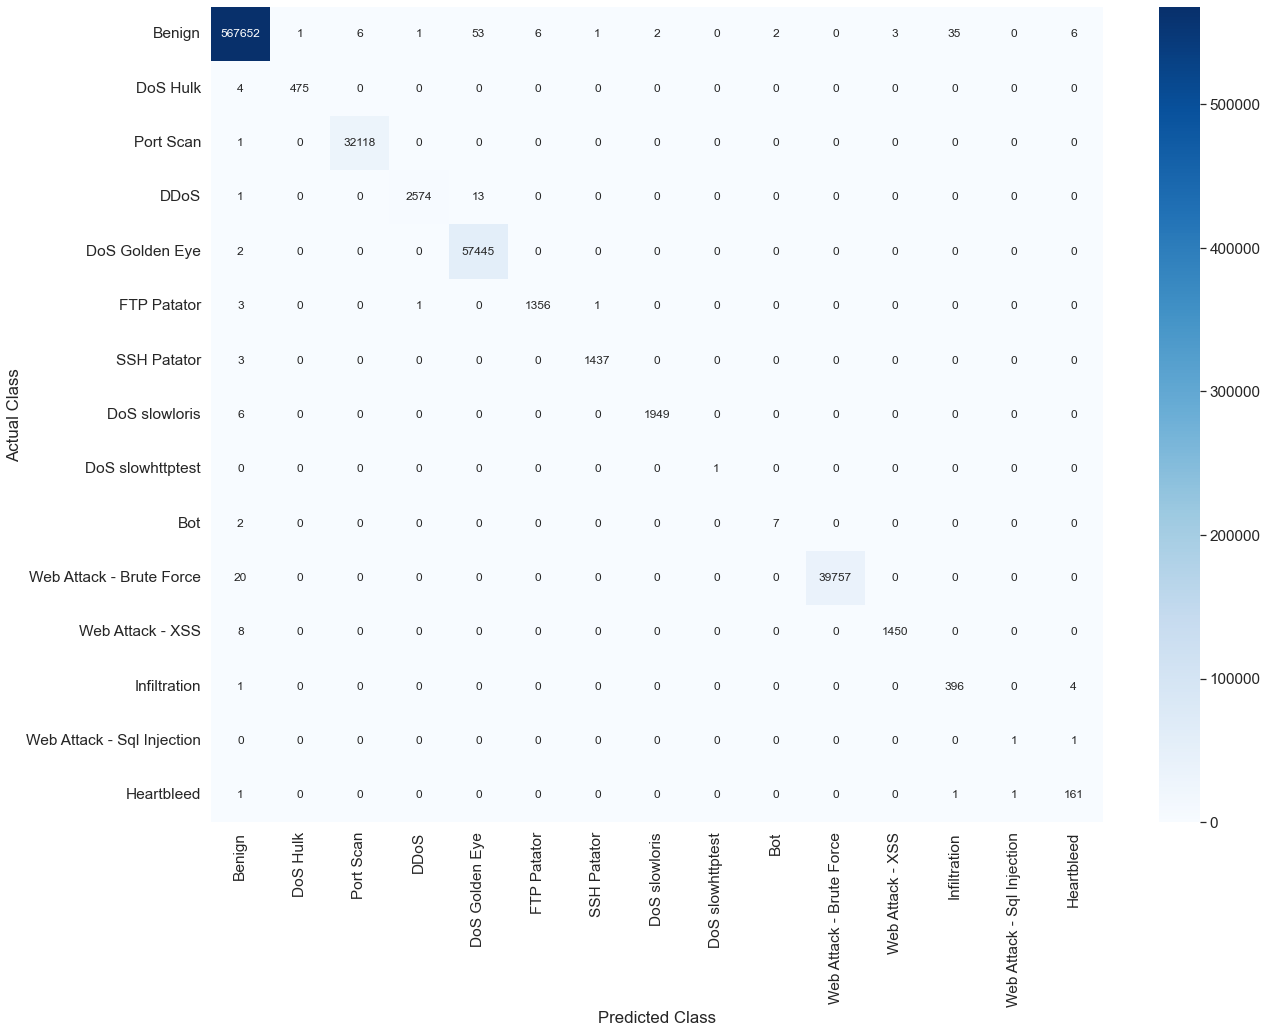

In [29]:
cf_matrix = confusion_matrix(y_test, pred)
cm_df = pd.DataFrame(cf_matrix)

labels = ['Benign','DoS Hulk','Port Scan','DDoS','DoS Golden Eye','FTP Patator','SSH Patator','DoS slowloris',
          'DoS slowhttptest','Bot','Web Attack - Brute Force','Web Attack - XSS','Infiltration','Web Attack - Sql Injection',
         'Heartbleed']

plt.figure(figsize=(20,15))
sn.set(font_scale=1.4)
sn.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels, yticklabels=labels, cmap='Blues')

#sn.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
    
plt.show() 

In [ ]:
start_by_epoch = 1
epochs = range(start_by_epoch, len(loss_values) + 1)

In [ ]:
plt.plot(epochs, acc[start_by_epoch-1:], label='Training accuracy')
plt.plot(epochs, val_acc[start_by_epoch-1:], label='Validation accuracy')
plt.title('CNN: Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')

plt.show()
plt.clf()

#plt.subplot(212)

plt.plot(epochs, loss_values[start_by_epoch-1:], label='Training Loss')
plt.plot(epochs, val_loss_values[start_by_epoch-1:], label='Validation Loss')
plt.title('CNN: Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.tight_layout()

plt.show()
plt.clf()

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(-0.02,1.02)
plt.title('CNN: Training and Validation Rate')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.show()

# LSTM-AE

In [4]:
import glob
import random

path = r'H:/Datasets/CIC-IDS2017/TrafficLabelling' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

#Since for LSTM-AE, the dataset is too big and to reduce the execution time, we will be using only 10%
p=0.10

for filename in all_files:
    df = pd.read_csv(filename, skiprows=lambda i: i>0 and random.random() > p, encoding='cp1252', index_col=None, header=0)
    li.append(df)
    print("Read Completed for ", filename)

df = pd.concat(li, axis=0, ignore_index=True)

df = df.rename(columns={' Label': 'Label'})

Read Completed for  H:/Datasets/CIC-IDS2017/TrafficLabelling\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
Read Completed for  H:/Datasets/CIC-IDS2017/TrafficLabelling\Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
Read Completed for  H:/Datasets/CIC-IDS2017/TrafficLabelling\Friday-WorkingHours-Morning.pcap_ISCX.csv
Read Completed for  H:/Datasets/CIC-IDS2017/TrafficLabelling\Monday-WorkingHours.pcap_ISCX.csv
Read Completed for  H:/Datasets/CIC-IDS2017/TrafficLabelling\Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
Read Completed for  H:/Datasets/CIC-IDS2017/TrafficLabelling\Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
Read Completed for  H:/Datasets/CIC-IDS2017/TrafficLabelling\Tuesday-WorkingHours.pcap_ISCX.csv
Read Completed for  H:/Datasets/CIC-IDS2017/TrafficLabelling\Wednesday-workingHours.pcap_ISCX.csv


In [5]:
df["Label"].value_counts()

BENIGN                      226741
DoS Hulk                     23355
PortScan                     15871
DDoS                         12669
DoS GoldenEye                 1035
FTP-Patator                    817
SSH-Patator                    626
DoS Slowhttptest               593
DoS slowloris                  590
Bot                            214
Web Attack – Brute Force       123
Web Attack – XSS                70
Infiltration                     3
Name: Label, dtype: int64

In [6]:
from scipy.stats import zscore

def expand_categories(values):
    result = []
    s = values.value_counts()
    t = float(len(values))
    for v in s.index:
        result.append("{}:{}%".format(v,round(100*(s[v]/t),2)))
    return "[{}]".format(",".join(result))
        
def analyze(df):
    print()
    cols = df.columns.values
    total = float(len(df))

    print("{} rows".format(int(total)))
    for col in cols:
        uniques = df[col].unique()
        unique_count = len(uniques)
        if unique_count>100:
            print("** {}:{} ({}%)".format(col,unique_count,int(((unique_count)/total)*100)))
        else:
            print("** {}:{}".format(col,expand_categories(df[col])))
            expand_categories(df[col])

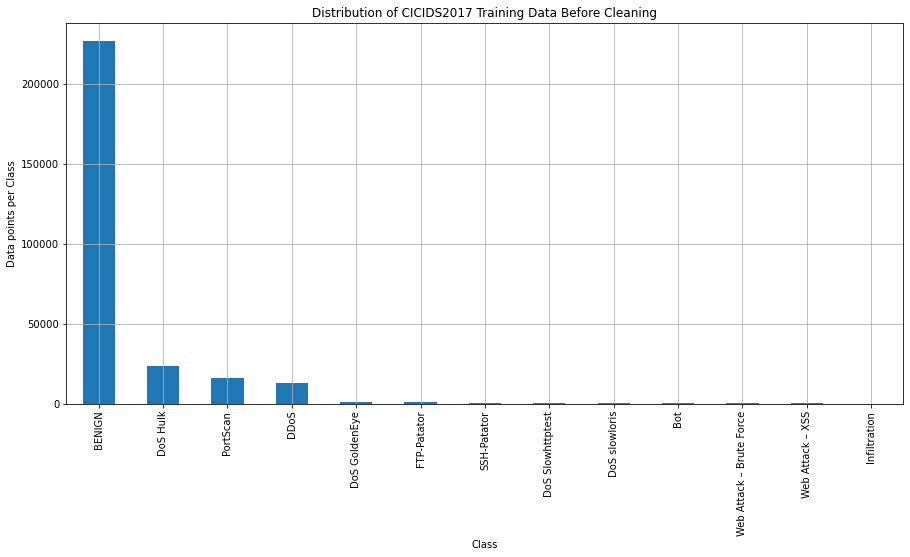

In [7]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

plt.figure(figsize=(15,7))
class_distribution = df['Label'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of CICIDS2017 Training Data Before Cleaning')
plt.grid()
plt.show()

In [9]:
# Before Cleaning Data set for Duplicate
sorted_ds = np.argsort(-class_distribution.values)
for i in sorted_ds:
    print('Number of data points in class', class_distribution.index[i],':', class_distribution.values[i], 
          '(', np.round((class_distribution.values[i]/df.shape[0]*100), 3), '%)')

Number of data points in class BENIGN : 226741 ( 72.829 %)
Number of data points in class DoS Hulk : 23355 ( 7.502 %)
Number of data points in class PortScan : 15871 ( 5.098 %)
Number of data points in class DDoS : 12669 ( 4.069 %)
Number of data points in class DoS GoldenEye : 1035 ( 0.332 %)
Number of data points in class FTP-Patator : 817 ( 0.262 %)
Number of data points in class SSH-Patator : 626 ( 0.201 %)
Number of data points in class DoS Slowhttptest : 593 ( 0.19 %)
Number of data points in class DoS slowloris : 590 ( 0.19 %)
Number of data points in class Bot : 214 ( 0.069 %)
Number of data points in class Web Attack – Brute Force : 123 ( 0.04 %)
Number of data points in class Web Attack – XSS : 70 ( 0.022 %)
Number of data points in class Infiltration : 3 ( 0.001 %)


In [11]:
#drop na values and reset index
data_clean = df.dropna().reset_index()

# Checkng for DUPLICATE values
data_clean.drop_duplicates(keep='first', inplace = True)

data_clean['Label'].value_counts()

print("Read {} rows.".format(len(data_clean)))

Read 282573 rows.


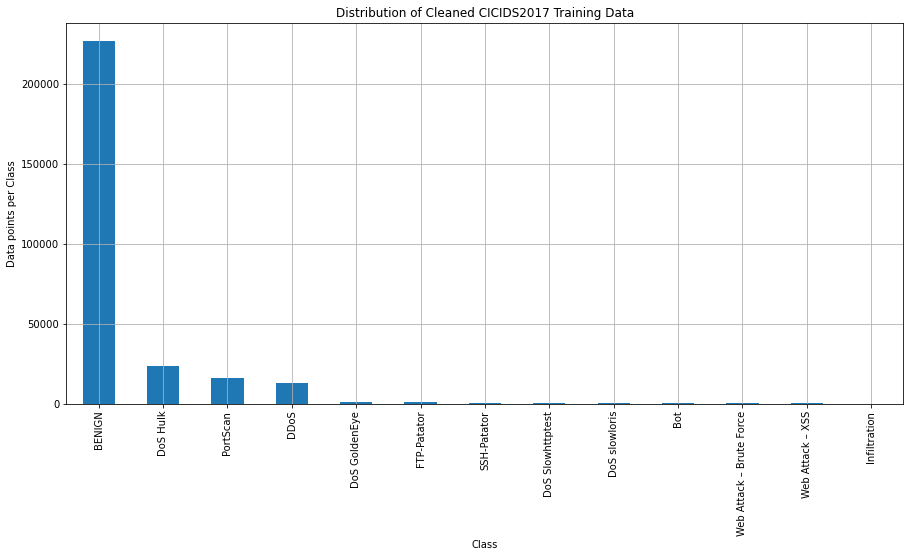

In [12]:
plt.figure(figsize=(15,7))
class_distribution = data_clean['Label'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of Cleaned CICIDS2017 Training Data')
plt.grid()
plt.show()

In [13]:
# After Cleaning Data set for Duplicate
sorted_ds = np.argsort(-class_distribution.values)
for i in sorted_ds:
    print('Number of data points in class', class_distribution.index[i],':', class_distribution.values[i], 
          '(', np.round((class_distribution.values[i]/df.shape[0]*100), 3), '%)')

Number of data points in class BENIGN : 226701 ( 72.816 %)
Number of data points in class DoS Hulk : 23261 ( 7.471 %)
Number of data points in class PortScan : 15871 ( 5.098 %)
Number of data points in class DDoS : 12669 ( 4.069 %)
Number of data points in class DoS GoldenEye : 1035 ( 0.332 %)
Number of data points in class FTP-Patator : 817 ( 0.262 %)
Number of data points in class SSH-Patator : 626 ( 0.201 %)
Number of data points in class DoS Slowhttptest : 593 ( 0.19 %)
Number of data points in class DoS slowloris : 590 ( 0.19 %)
Number of data points in class Bot : 214 ( 0.069 %)
Number of data points in class Web Attack – Brute Force : 123 ( 0.04 %)
Number of data points in class Web Attack – XSS : 70 ( 0.022 %)
Number of data points in class Infiltration : 3 ( 0.001 %)


In [14]:
data_clean=data_clean.drop('Flow ID',axis=1)
data_clean=data_clean.drop(' Source IP',axis=1)
data_clean=data_clean.drop(' Destination IP',axis=1)
data_clean=data_clean.drop(' Timestamp',axis=1)
#df=df.drop(' Source Port',axis=1)
#df=df.drop(' Destination Port',axis=1)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder



#drop na values and reset index
data_clean = data_clean.dropna().reset_index()

# label encoding
labelencoder = LabelEncoder()
data_clean['Label'] = labelencoder.fit_transform(data_clean['Label'])

data_clean['Label'].value_counts()

0     226701
4      23261
9      15871
2      12669
3       1035
7        817
10       626
5        593
6        590
1        214
11       123
12        70
8          3
Name: Label, dtype: int64

In [16]:
print(data_clean.shape)

(282573, 83)


In [17]:
data_np = data_clean.to_numpy(dtype="float32")

#drop inf values
data_np = data_np[~np.isinf(data_np).any(axis=1)]

X = data_np[:, 0:81]

enc = OneHotEncoder()

Y = enc.fit_transform(data_np[:,82:]).toarray()

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.25, random_state=2, shuffle=True)

_features = X.shape[1]
n_classes = Y.shape[1]

print('X.shape = ',X.shape)
print('Y.shape = ',Y.shape)
print('X_train.shape = ',X_train.shape)
print('y_train.shape = ', Y_train.shape)
print('X_test.shape = ', X_test.shape)
print('y_test.shape = ',Y_test.shape)

X.shape =  (282424, 81)
Y.shape =  (282424, 13)
X_train.shape =  (211818, 81)
y_train.shape =  (211818, 13)
X_test.shape =  (70606, 81)
y_test.shape =  (70606, 13)


In [19]:
from keras import regularizers
from keras.layers import Dense, LeakyReLU, BatchNormalization, Input, LSTM, TimeDistributed, RepeatVector
from keras import Input
from sklearn.preprocessing import MinMaxScaler
from keras.models import Model
from keras import regularizers

In [20]:
# reshape inputs for LSTM [samples, timesteps, features]
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
print("Training data shape:", X_train.shape)
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
print("Test data shape:", X_test.shape)

Training data shape: (211818, 1, 81)
Test data shape: (70606, 1, 81)


In [21]:
# define the autoencoder network model
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))
    L1 = LSTM(250, activation='relu', return_sequences=True, 
              kernel_regularizer=regularizers.l2(0.00))(inputs)
    L2 = LSTM(125, activation='relu', return_sequences=False)(L1)
    L3 = RepeatVector(X.shape[1])(L2)
    L4 = LSTM(125, activation='relu', return_sequences=True)(L3)
    L5 = LSTM(250, activation='relu', return_sequences=True)(L4)
    output = TimeDistributed(Dense(X.shape[2]))(L5)    
    model = Model(inputs=inputs, outputs=output)
    return model

In [22]:
# create the autoencoder model
model = autoencoder_model(X_train)
model.compile(optimizer='adam', loss='mse', metrics='accuracy') 
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 81)]           0         
                                                                 
 lstm (LSTM)                 (None, 1, 250)            332000    
                                                                 
 lstm_1 (LSTM)               (None, 125)               188000    
                                                                 
 repeat_vector (RepeatVector  (None, 1, 125)           0         
 )                                                               
                                                                 
 lstm_2 (LSTM)               (None, 1, 125)            125500    
                                                                 
 lstm_3 (LSTM)               (None, 1, 250)            376000    
                                                             

In [23]:
# fit the model to the data
nb_epochs = 30
batch_size = 32
history = model.fit(X_train, X_train, epochs=nb_epochs, batch_size=batch_size,
                    validation_split=0.05).history

Epoch 1/30
6289/6289 [==============================] - 170s 10ms/step - loss: 0.0175 - accuracy: 0.9917 - val_loss: 0.0110 - val_accuracy: 0.9962
Epoch 2/30
6289/6289 [==============================] - 171s 11ms/step - loss: 0.0079 - accuracy: 0.9973 - val_loss: 0.0063 - val_accuracy: 0.9972
Epoch 3/30
6289/6289 [==============================] - 170s 11ms/step - loss: 0.0057 - accuracy: 0.9982 - val_loss: 0.0046 - val_accuracy: 0.9982
Epoch 4/30
6289/6289 [==============================] - 170s 11ms/step - loss: 0.0045 - accuracy: 0.9986 - val_loss: 0.0036 - val_accuracy: 0.9986
Epoch 5/30
6289/6289 [==============================] - 169s 11ms/step - loss: 0.0038 - accuracy: 0.9989 - val_loss: 0.0035 - val_accuracy: 0.9987
Epoch 6/30
6289/6289 [==============================] - 169s 11ms/step - loss: 0.0031 - accuracy: 0.9990 - val_loss: 0.0030 - val_accuracy: 0.9990
Epoch 7/30
6289/6289 [==============================] - 169s 11ms/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0

In [24]:
# Plot for training and validation loss
history_dict = history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

In [25]:
start_by_epoch = 1
epochs = range(start_by_epoch, len(loss_values) + 1)

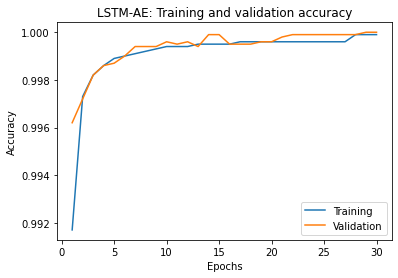

<Figure size 432x288 with 0 Axes>

In [26]:
plt.plot(epochs, acc[start_by_epoch-1:], label='Training accuracy')
plt.plot(epochs, val_acc[start_by_epoch-1:], label='Validation accuracy')
plt.title('LSTM-AE: Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Test'], loc='lower right')

plt.show()
plt.clf()

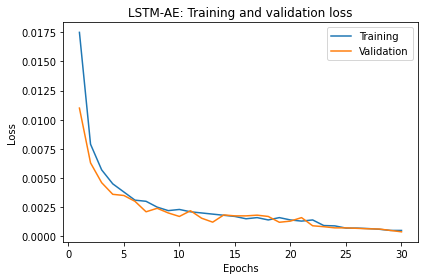

<Figure size 432x288 with 0 Axes>

In [27]:
plt.plot(epochs, loss_values[start_by_epoch-1:], label='Training Loss')
plt.plot(epochs, val_loss_values[start_by_epoch-1:], label='Validation Loss')
plt.title('LSTM-AE: Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.tight_layout()

plt.show()
plt.clf()

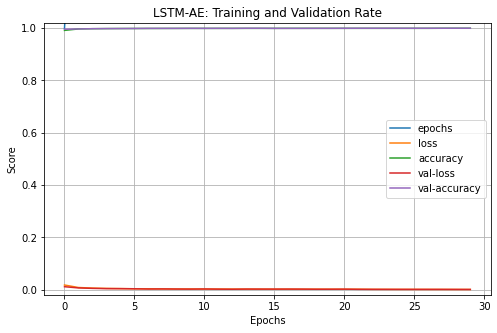

In [28]:
pd.DataFrame(history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(-0.02,1.02)
plt.title('LSTM-AE: Training and Validation Rate')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.show()

In [29]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test = Y_test.argmax(axis=1)

2207/2207 [==============================] - 5s 2ms/step


In [30]:
import datetime as dt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn import preprocessing

start = dt.datetime.now()

escore = model.evaluate(X_test, Y_test, batch_size=32)
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_eval = np.argmax(Y_test,axis=1)

score = metrics.accuracy_score(y_eval, pred)
rscore = recall_score(y_eval, pred, average='weighted')
ascore = precision_score(y_eval, pred, average='weighted')
f1score= f1_score(y_eval, pred, average='weighted') #F1 = 2 * (precision * recall) / (precision + recall) for manual

lb = preprocessing.LabelBinarizer()
lb.fit(y_eval)
y_eval = lb.transform(y_eval)
pred = lb.transform(pred)
roc_score = roc_auc_score(y_eval, pred)
#roc_auc_socre = multiclass_roc_auc_score(y_eval, pred)

print('Completed')
print('Time taken:',dt.datetime.now()-start)

print("Validation score: {}".format(score))
print("Evaluation score: {}".format(escore))
print("Recall score: {}".format(rscore))
print("Precision score: {}".format(ascore))
print("F1 Measure score: {}".format(f1score))
print("ROC-AUC score: {}".format(roc_score))

22093/22093 [==============================] - 118s 815us/step
Completed
Time taken: 0:04:26.304259
Validation score: 0.9999312470560944
Evaluation score: [0.000531577936373651, 0.9997312426567078]
Recall score: 0.9999312470560944
Precision score: 0.9999356835334247
F1 Measure score: 0.9999325238989045
ROC-AUC score: 0.9839197421460956


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import seaborn as sn

confMat = confusion_matrix(y_test, pred)
confMat

In [ ]:
confMat = confusion_matrix(y_test, pred)
cm_df = pd.DataFrame(confMat)

labels = ['Benign','DDOS attack-HOIC','DoS attacks-Hulk','Bot','Infilteration','DoS attacks-SlowHTTPTest',
          'DoS attacks-GoldenEye','DoS attacks-Slowloris','DDOS attack-LOIC-UDP','Brute Force -Web','Brute Force -XSS',
          'SQL Injection']

plt.figure(figsize=(20,15))
sn.set(font_scale=1.4)
sn.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels, yticklabels=labels, cmap='Blues')

#sn.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
    
plt.show() 